# Unsupervised Learning and Principal Components Analysis (65)

Unsupervised learning has to deal with how data is sorted based on their features, without set classifiers/labels. There are 2 methods:
* **principal components analysis**, a tool used for data visualization of data pre-processing before supervised techniques are applied, and
* **clustering**, a broad class of methods for discovering unknown subgroups in data.

It's important to develop unsupervised learning techniques to data because much data is unlabled.

### PCA

* The **first principal component** of a set of features $X_1, X_2, ..., X_p$ is the normalized linear combo of the features: $$ Z_1 = \phi_{11}X_1 + \phi_{21}X_2 + ... + \phi_{p1}X_p$$ that has the largest variance. By **normalized**, we mean that $\sum_{j=1}^{p} \phi_{j1}^2 = 1$.
* We choose weights $\phi_{11} ,..., \phi_{p1}$ as the **loadings**.
* We contrain the loadings so that their sum of squares = 1, so that the variance is contained.
* We compute the components by:
    * Looking at dataset $n \times p $ we assume each of the variables in X has be centered to have mean zero.
    * Then we look for the linear combinations of the sample feature values of the form: $$z_{i1} = \phi_{11}x_{i1} + \phi_{21}x_{i2} + ... + \phi_{p1}x_{ip} $$ for $i = 1,...,n$ that has the largest sample variance.
* We plug the above formulat into the first principal component loading vector: $$\max_{\phi_{11},...,\phi_{p1}} \frac{1}{n} \sum_{i=1}^{n} \bigg( \sum_{j=1}^p \phi_{j1}x_{ij} \bigg) ^ 2 \text{ s.t. } \sum_{j=1}^p \phi_{j1}^2 = 1 $$.
    * we can solve this via a singular-value-decomposition of the matrix X.
    * We refer to $Z_1$ as the first principal component with realized values $z_{11},..., z_{n1}$.

# Exploring Principal Components Analysis and Proportion of Variance Explained (66)

* The second principal component is the linear combo of $X_1, ..., X_p$ that has maximal variance among all linear combos that are **uncorrelated** to $X_1$.
* You can have at most $n - 1$ principal components.
* Ex: `USAarrests` data: for each of the 50 states in the US, the dataset contains the number of arrests per 100,000 residents for each of three crimes: `Assault`, `Murder`, and `Rape`.
    * Plot has lots of state on the axes (First PC, Second PC). Low crime areas include "Maine", "Idaho", while high crime include "California", "New York"...
* You want a plane that minimizes orthogonal distance between points.

### Proportion Variance Explained

* To understand the strength of each component, we are interested in knowing the proportion of variance explained.
* The **total variacne** present in a data set (assuming that the variables have been centered to have mean zero) is defined as: $$\sum_{j=1}^{p} Var (X_j) = \sum_{j=1}^{p} \frac {1}{n} \sum_{i=1}^{n} x^2_{ij} $$ and the variance explained the the *m*th principal component is: $$ Var(Z_m) = \frac {1}{n} \sum_{i=1}^{n} z_{im}^2 $$
* Thefore the PVE of the *m*th principal component is between 0, 1: $$ \dfrac{\sum_{i=1}^n z^2_{im}} {\sum_{j=1}^p \sum_{i=1}^n x^2_{ij}} $$

There's no simple answer to how many PCs to use. **CV isn't usable because there's no y-response**. The idea is to use the **elbow rule**.

# K-means Clustering (67)

PCA looks for a low-dimensional representation of the observations that explain a good fraction of the variance. **Clustering** looks for homogeneous subgroups among the observations.
* Our goal is to perform **market segmentation** by identiying subgroups of people who might be more receptive to a particular form of advertising.
* **K-means** involves partitioning the observations into a pre-sepecified number of clusters

Let $C_1,..., C_K$ denote sets containing the indices of the observations in each cluster. They satisfy two properties: 
1. $C_1 \cup C_2 \cup ... \cup C_K = \{1,...,n\}$, i.e. each observation belongs to at least one of the K clusters.
2. $C_k \cap C_{k'} = \emptyset \forall k \ne k'$ No clusters overlap.

The idea is to minimize variation s.t we: 

$$\min_{C_1,...,C_K} \bigg\{ \sum_{k=1}^K WCV(C_k) \bigg\} $$ where WCV(Ck) is the within-cluster variation.

$$ WCV(C_k) = \frac{1}{|C_k|} \sum_{i,i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})^2 $$ where |Ck| denotes the number of observations in the kth cluster.

The steps are:
1. Randomly assign a number, from 1 to k, to each of the observations.
2. Iterate until the cluster assignment stop changing:
    * For each of the K clusters, compute the cluster **centroid**. The kth cluster centroid is the vector of the p feature means for the observations in the kth cluster.
    * Assign each observation to the cluster whose centroid is closets (where **closets** is defined using Euclidean distance)

# Hierarchical Clustering (68)

**Hierarchical** means we don't know how many clusters we want, and end up with a **dendrogram**, a tree-like cluster. The **bottom-up** clustering is the most popular.

The main idea is this:
1. Start with each point in its own cluster.
2. Identify the closest two clusters and merge them.
3. Repeat.
4. Ends when all points are in a single cluster.

By "distance" we've been using Euclidean distance. An alternative is **correlation-based distance** which considers two observations to be similar if their features are highly correlated. Note that **scaling matters!!!** You should just pick where the biggest drop in the tree (based on Euclidean distance of the cluster centroids). 

# Example of Hierarchical Clustering (69)

Gene expressure measurements for about 8000 genes, for each of 88 breast cancer patients. They used average linkage, correlation metric. Clustered samples using 500 **intrinsic genes**: each woman was measured before and after chemo. Intrinsic genes have smallest with/between variation.

# R-Lab, PCA (70)

In [2]:
dimnames(USArrests)
apply(USArrests, 2, mean)
apply(USArrests, 2, var)

[[1]]
 [1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"       

[[2]]
[1] "Murder"   "Assault"  "UrbanPop" "Rape"

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

In [3]:
pca.out = prcomp(USArrests, scale = TRUE)
pca.out
# note the stdevs are constantly decreasing.

Standard deviations:
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation:
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432

In [4]:
names(pca.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

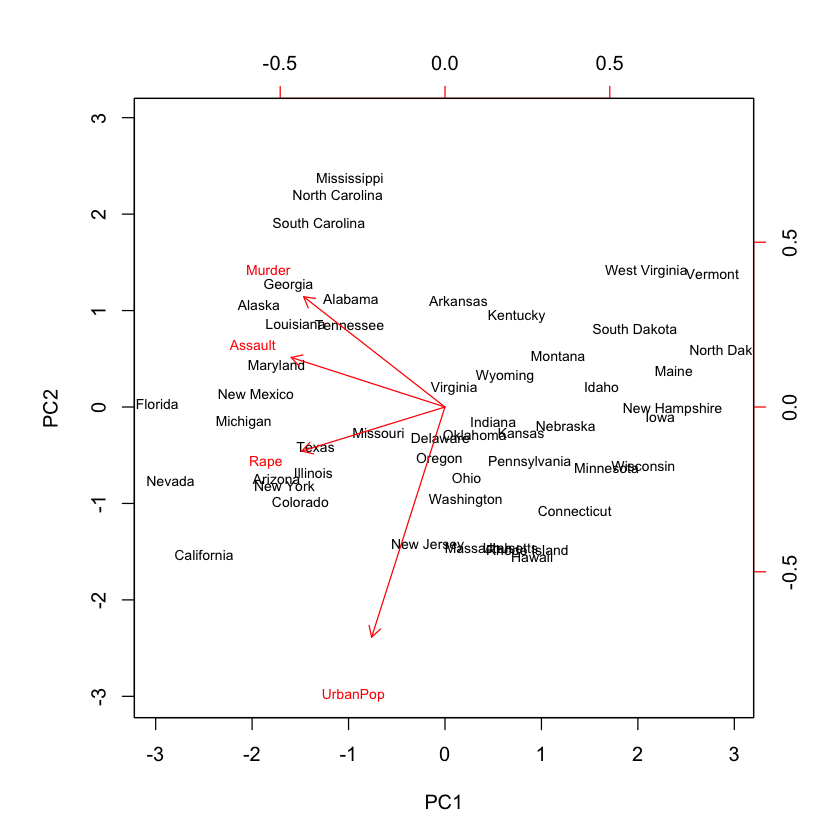

In [8]:
biplot(pca.out, scale = 0, cex = .7)

# R-Lab, K-Means Clustering (71)

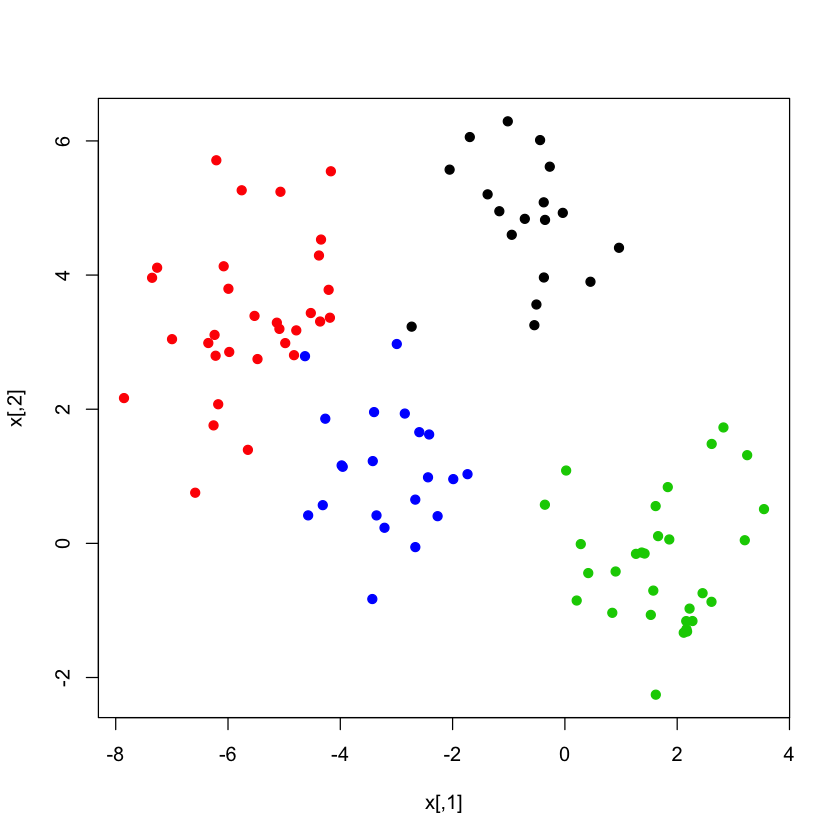

In [10]:
set.seed(101)
x = matrix(rnorm(100*2), 100, 2)
xmean = matrix(rnorm(8, sd = 4), 4, 2)
which = sample(1:4, 100, replace = TRUE)
# which observation belows to which cluster
x = x + xmean[which, ]
plot(x, col = which, pch = 19)

In [11]:
km.out = kmeans(x, 4, nstart = 15)
km.out

K-means clustering with 4 clusters of sizes 21, 30, 32, 17

Cluster means:
        [,1]       [,2]
1 -3.1068542  1.1213302
2  1.7226318 -0.2584919
3 -5.5818142  3.3684991
4 -0.6148368  4.8861032

Clustering vector:
  [1] 2 3 3 4 1 1 4 3 2 3 2 1 1 3 1 1 2 3 3 2 2 3 1 3 1 1 2 2 3 1 1 4 3 1 3 3 1
 [38] 2 2 3 2 2 3 3 1 3 1 3 4 2 1 2 2 4 3 3 2 2 3 2 1 2 3 4 2 4 3 4 4 2 2 4 3 2
 [75] 3 4 4 2 2 1 2 4 4 3 3 2 3 3 1 2 3 2 4 4 4 2 3 3 1 1

Within cluster sum of squares by cluster:
[1] 30.82790 54.48008 71.98228 21.04952
 (between_SS / total_SS =  87.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

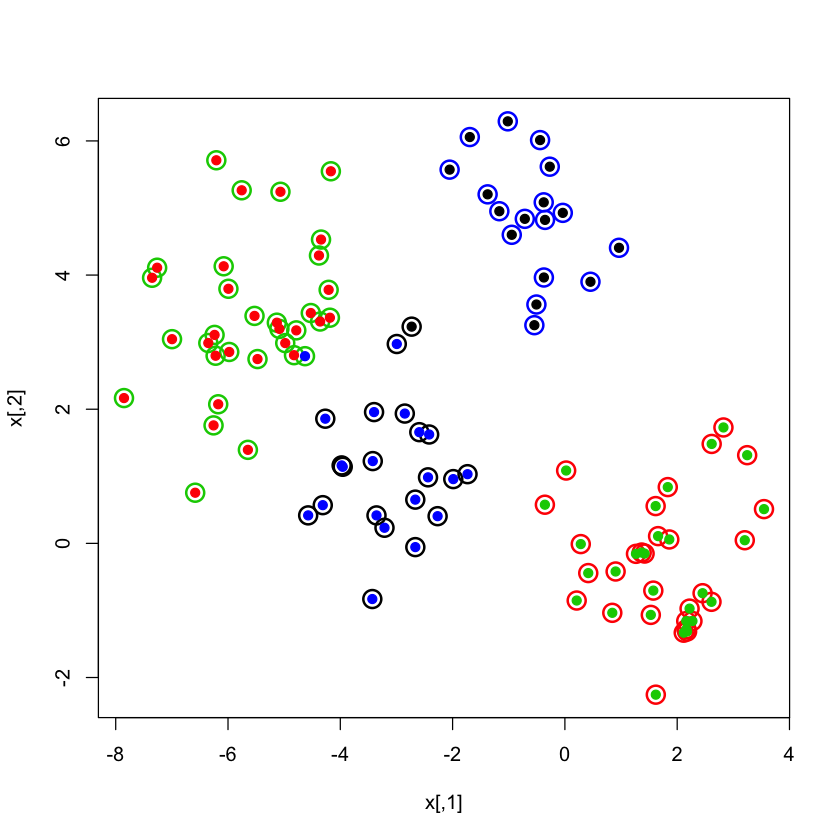

In [12]:
plot(x, col = km.out$cluster, cex = 2, pch = 1, lwd = 2)
points(x, col = which, pch = 19)
# note that the ordering is off.

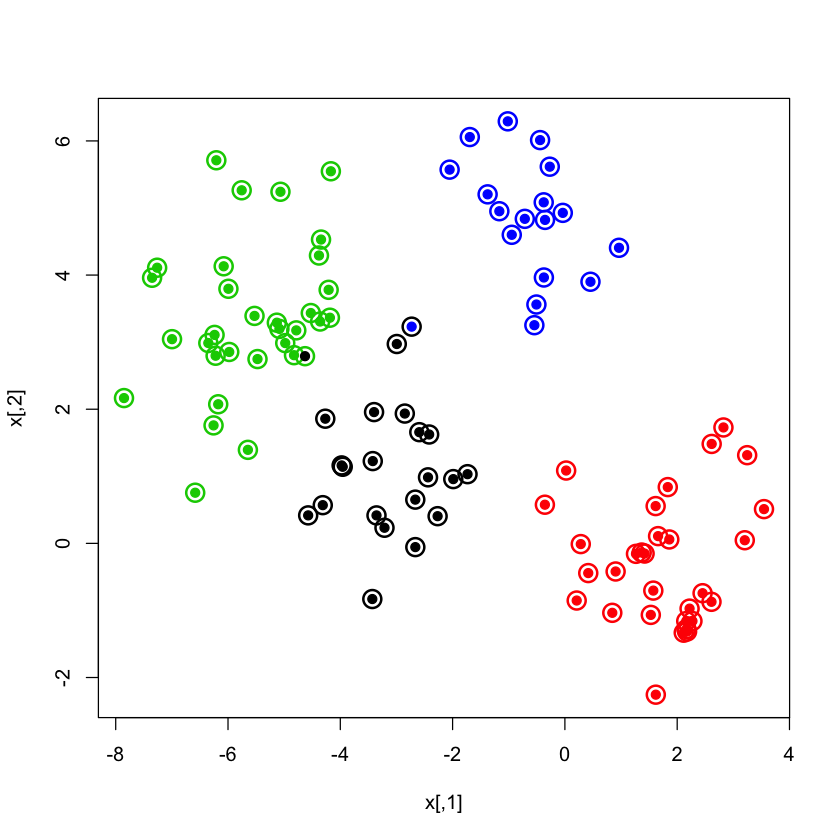

In [14]:
plot(x, col = km.out$cluster, cex = 2, pch = 1, lwd = 2)
points(x, col = c(4, 3, 2, 1)[which], pch = 19)

# Heirarchical Clustering (72)

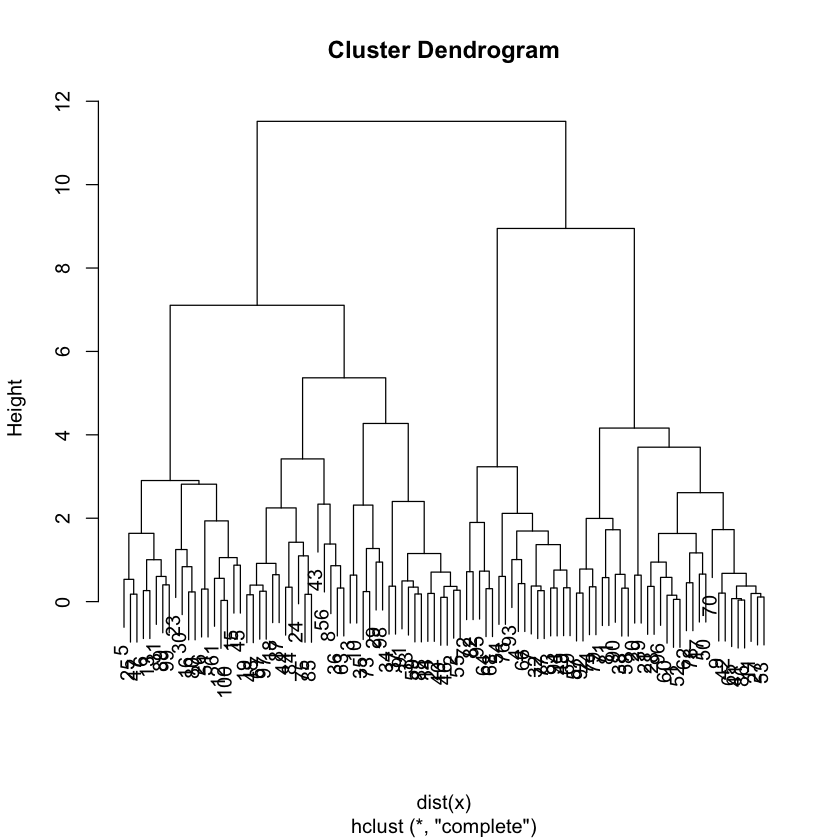

In [15]:
hc.complete = hclust(dist(x), method = "complete")
plot(hc.complete)
# this is prefered

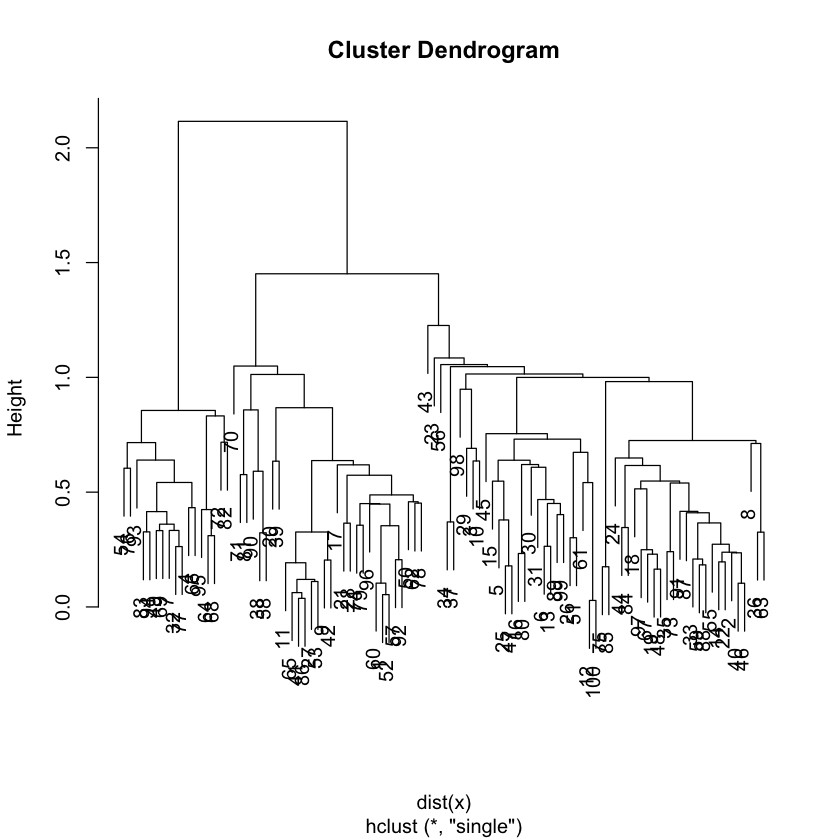

In [16]:
hc.single = hclust(dist(x), method = "single")
plot(hc.single)

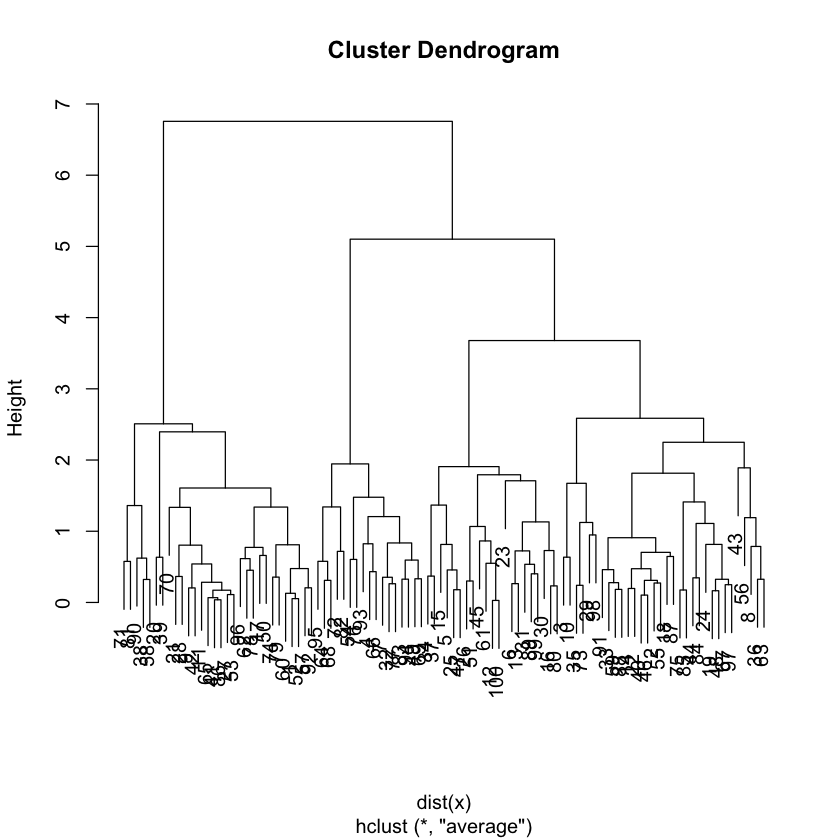

In [17]:
hc.average = hclust(dist(x), method = "average")
plot(hc.average)

In [19]:
hc.cut = cutree(hc.complete, 4)
table(hc.cut, which)
table(hc.cut, km.out$cluster)

      which
hc.cut  1  2  3  4
     1  0  0 30  0
     2  1 31  0  2
     3 17  0  0  0
     4  0  0  0 19

      
hc.cut  1  2  3  4
     1  0 30  0  0
     2  2  0 32  0
     3  0  0  0 17
     4 19  0  0  0

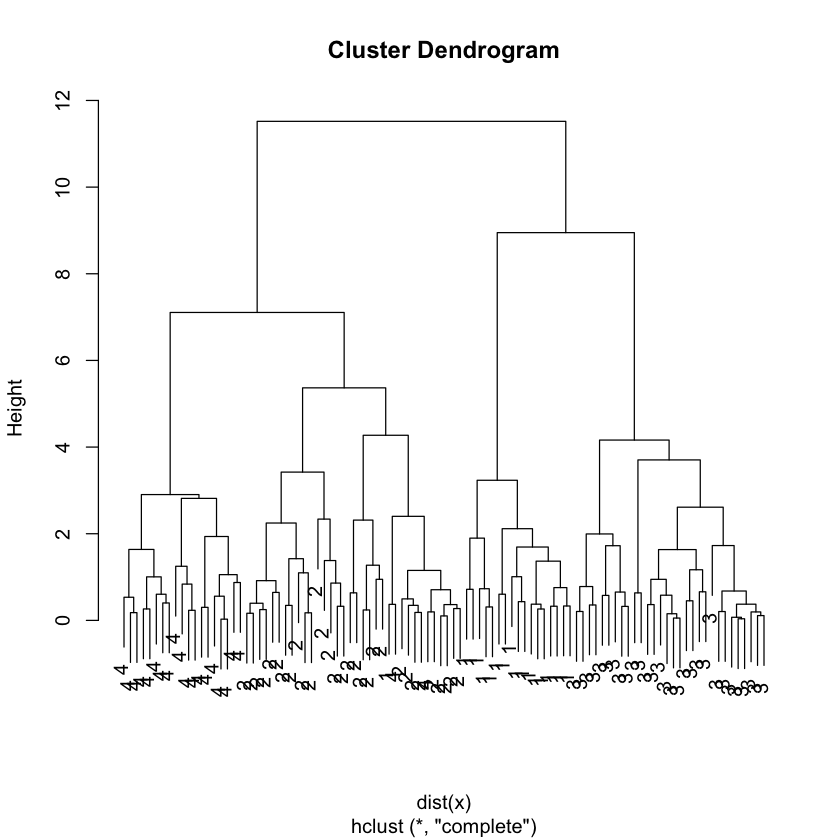

In [20]:
plot(hc.complete, labels = which)